# Conversion Rate Analysis

1.	Proportion of users who converted.
2.	Monthly Conversion Rate VS Monthly Average Conversion Rate
3.	Monthly Conversions Volume VS Monthly Average Conversions Volume
4.	Monthly Leads Volume
5.	Correlation Analysis between 
    - Conversion Rate and MQL Volume
    - Conversion Rate and Conversions Volume
7.	Conversions Volume Across Channel
8.  Conversion Rate Across Channel
9.	Leads Volume Across Channels
10.	Monthly Conversions Across Channel
11.	Which channel is the most effective in generating leads and converting users?

In [149]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [150]:
#set plotting style
plt.style.use('seaborn')

## Data Gathering

In [151]:
#load funnel datasets
mql=pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
closed_deals=pd.read_csv('olist_closed_deals_dataset.csv')

### Database Structure
<img src="olist_database_structure.png">

### Join funnel datasets

The two dataframes that are going to be joint are 'mql' containing data regarding marketing qulified leads that reached out to Olist sales reps and 'closed_deals' containg data about the marketing qualified leads that converted.

In [152]:
#joining funnel datasets
funnel = mql.merge(closed_deals, on='mql_id', how='left')
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


### Create variable 'converted'

In [153]:
#creating variable 'converted' to establish which leads converted
funnel['converted']=funnel['seller_id'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,Yes


In [154]:
#selecting columns
funnel=funnel[['mql_id','first_contact_date','landing_page_id','origin','converted']]
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,No
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,No
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,No
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,No
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,Yes


## Data Assessing

In [155]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null object
landing_page_id       8000 non-null object
origin                7940 non-null object
converted             8000 non-null object
dtypes: object(5)
memory usage: 375.0+ KB


### Check Duplicates

In [156]:
#check duplicates
funnel.duplicated().any()

False

No duplicate observations in the dataset.

### Data Cleaning Issues:

 1. **first_contact_date** is an object and not datetime
 
 2. **origin** has 60 missing values: change NaN to 'unknown'

## Data Cleaning

### 1. Convert 'first_contact_date' to datetime

In [157]:
funnel['first_contact_date']=pd.to_datetime(funnel['first_contact_date'])
#check results
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
landing_page_id       8000 non-null object
origin                7940 non-null object
converted             8000 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 375.0+ KB


### 2.Change NaN with 'unknown' in 'origin'

In [158]:
funnel['origin'].fillna('unknown', inplace=True)
#check results
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
landing_page_id       8000 non-null object
origin                8000 non-null object
converted             8000 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 375.0+ KB


### Sort values by 'first_contact_date'

In [159]:
funnel.sort_values('first_contact_date', ascending=True, inplace=True)
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,converted
1973,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,No
5232,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,No
5358,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown,No
2676,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email,No
2976,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic,No


## Functions:

- **stat_summary**: returns a DataFrame with summary statistics and statistical moments of a Series.
- **plot_distribution**: plots a distribution of a Series (hist, kde, quartiles, mean)
- **plot_distribution_subplot**: as above but includes additional argument 'axis' to allow using the function in subplots. 

In [160]:
# define stat_summary
def stat_summary(data):

    values=[data.count(),
            data.min(),
            data.max(),
            data.mean(),
            data.median(),
            data.quantile(0.25),
            data.quantile(0.75),
            data.var(),
            data.kurtosis(),
            data.skew()]
    index=['count','min','max','mean','median','1st_quartile','3rd_quartile','variance','kurtosis','skewness']    
    stat_summary=pd.DataFrame(data=values, index=index, columns=['Value'])
    
    return stat_summary

In [161]:
# define _plot_distribution
def plot_distribution(data, title, axlabel):
    
    sns.distplot(data, axlabel=axlabel)
    plt.axvline(data.mean(), c='green', ymax=0.95)
    plt.axvline(data.median(), c='orange', ymax=0.95)
    plt.axvline(data.describe()[4], c='yellow', ymax=0.95)
    plt.axvline(data.describe()[6], c='red', ymax=0.95)
    plt.title(title)
    plt.legend(labels=['mean', 'median', '1st quartile', '3rd quartile'])
    return

In [162]:
#define plot_distribution_subplot
def plot_distribution_subplot(data, title, axlabel, ax):
    plt.figure(figsize=(12,6))
    sns.distplot(data, axlabel=axlabel,ax=ax)
    ax.axvline(data.mean(), c='green', ymax=0.95)
    ax.axvline(data.median(), c='orange', ymax=0.95)
    ax.axvline(data.describe()[4], c='yellow', ymax=0.95)
    ax.axvline(data.describe()[6], c='red', ymax=0.95)
    ax.set_title(title)
    ax.legend(labels=['mean', 'median', '1st quartile', '3rd quartile'])
    return

## Exploratory Data Analysis - Analysis of conversions over time to identify what channel could drive conversions most

### 1. Proportion of users who converted

In [163]:
funnel['converted'].value_counts(normalize=True)

No     0.89475
Yes    0.10525
Name: converted, dtype: float64

The **10.5% of the users converted** over the period under examination.

### 2. Monthly Conversion Rate VS Monthly Average Conversion Rate

In [164]:
#define funnel_ts in order to resample data (datetime index is needed)
funnel_ts=funnel.set_index('first_contact_date')

In [165]:
#get montlhy conversion rate
monthly_conv_rate=(funnel_ts.resample('M')['converted'].value_counts(normalize=True).unstack().fillna(0))*100
stat_summary(monthly_conv_rate.Yes)

,Value
count,12.000000
min,0.000000
max,14.494163
mean,6.989626
median,4.772472
1st_quartile,2.309602
3rd_quartile,13.375111
variance,32.317573
kurtosis,-1.847776
skewness,0.299031


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


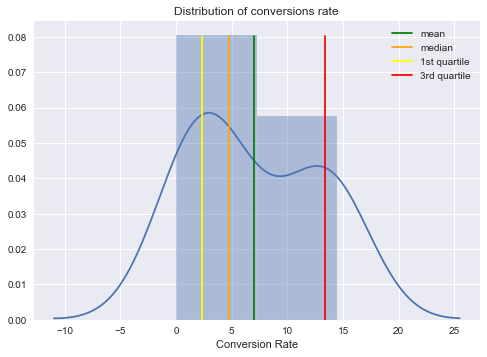

In [166]:
plot_distribution(monthly_conv_rate.Yes, 'Distribution of conversions rate', 'Conversion Rate')

The **monthly average conversion rate** is 6.98%, the **median** is 4.77%. The median is smaller than the mean, that suggests that the distribution is skewed to the left.

In [167]:
#get overall percent change
((monthly_conv_rate.loc['2018-05-31','Yes']-monthly_conv_rate.loc['2017-07-31','Yes'])/monthly_conv_rate.loc['2017-07-31','Yes'])*100

1092.2486569455102

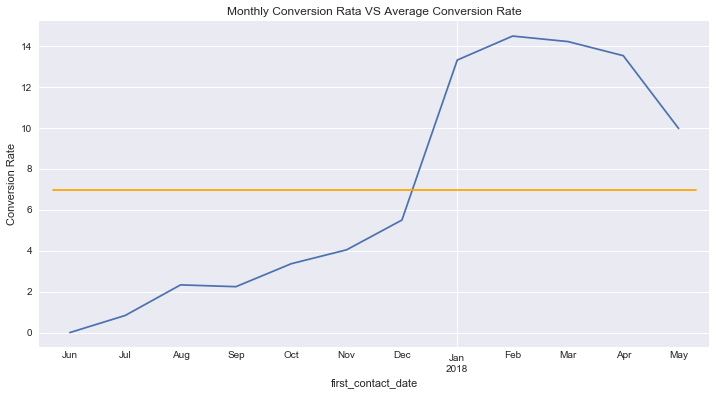

In [168]:
#plot conversions rate
monthly_conv_rate.Yes.plot(figsize=(12,6), title=('Monthly Conversion Rata VS Average Conversion Rate')).set_ylabel('Conversion Rate')
plt.axhline((monthly_conv_rate.Yes.mean()), color='orange', xmin=0.02, xmax=0.98)

The conversion rate consistently grew until February 2018, the overall percent change of the conversion rate is 1092.24% during the period under observation.

### 3. Monthly Conversions Volume VS Monthly Average Conversions Volume

In [169]:
#get montlhy conversion rate
monthly_conv_vol=funnel_ts.resample('M')['converted'].value_counts().unstack().fillna(0)
#check results
monthly_conv_vol.Yes.describe()

count     12.000000
mean      70.166667
std       77.034624
min        0.000000
25%        8.500000
50%       16.000000
75%      149.750000
max      183.000000
Name: Yes, dtype: float64

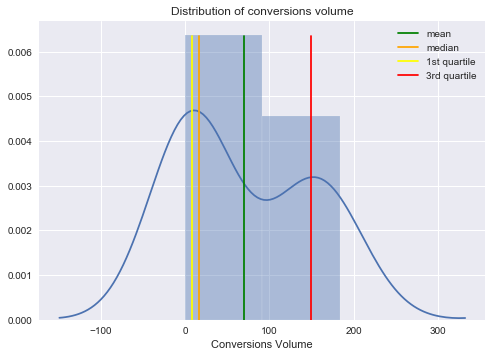

In [170]:
plot_distribution(monthly_conv_vol.Yes, 'Distribution of conversions volume', 'Conversions Volume')

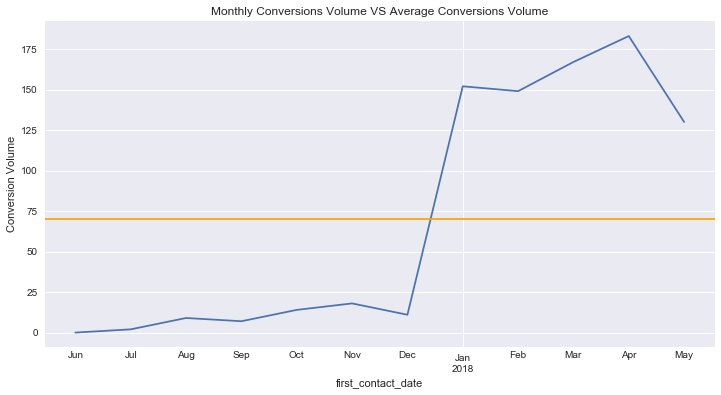

In [171]:
#plot conversions volums
monthly_conv_vol.Yes.plot(figsize=(12,6), title=('Monthly Conversions Volume VS Average Conversions Volume')).set_ylabel('Conversion Volume')
plt.axhline(y=monthly_conv_vol.Yes.mean(), color='orange')

### 4. Monthly Leads Volume

In [172]:
#get monthly conversions volume
monthly_leads_vol=funnel_ts.resample('M')['mql_id'].count().rename('leads_vol').to_frame()
#check results
stat_summary(monthly_leads_vol.leads_vol)

,Value
count,12.000000
min,4.000000
max,1352.000000
mean,666.666667
median,430.500000
1st_quartile,293.750000
3rd_quartile,1149.250000
variance,240352.606061
kurtosis,-1.795064
skewness,0.277575


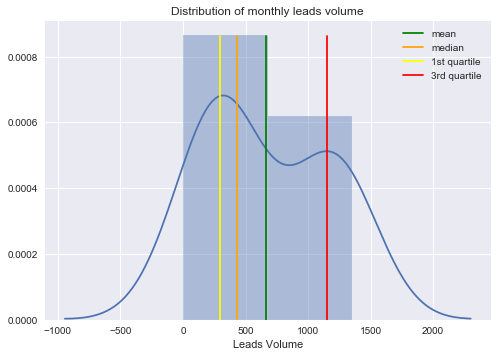

In [173]:
#plot distribution
plot_distribution(monthly_leads_vol.leads_vol,'Distribution of monthly leads volume', 'Leads Volume')

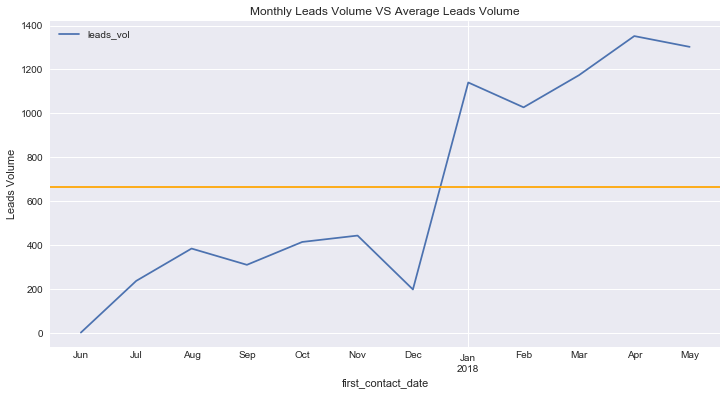

In [174]:
#plot leads volume
monthly_leads_vol.plot(figsize=(12,6), title=('Monthly Leads Volume VS Average Leads Volume')).set_ylabel('Leads Volume')
plt.axhline(y=monthly_leads_vol.leads_vol.mean(), color='orange')

### Distribution and Evolution of Conversion Rate, Converions Volume and Leads Volume

Text(0, 0.5, 'Leads Volume')

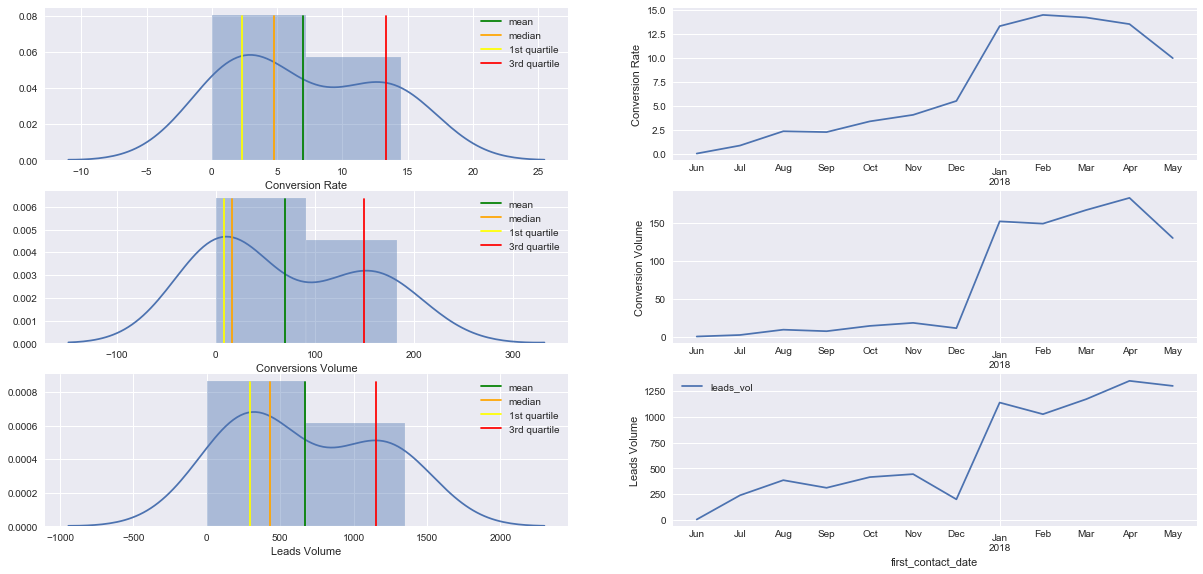

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [175]:
fig=plt.figure(figsize=(20,8))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0, top=0.9)

ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

plot_distribution_subplot(monthly_conv_rate.Yes, None, 'Conversion Rate',ax1)
monthly_conv_rate.Yes.plot(ax=ax2).set_ylabel('Conversion Rate')
plot_distribution_subplot(monthly_conv_vol.Yes, None, 'Conversions Volume',ax3)
monthly_conv_vol.Yes.plot(ax=ax4).set_ylabel('Conversion Volume')
plot_distribution_subplot(monthly_leads_vol.leads_vol, None, 'Leads Volume',ax5)
monthly_leads_vol.plot(ax=ax6).set_ylabel('Leads Volume')


Despite a drop in leads volume and conversions volume happened in December 2017, the conversion rate grew steadily. Although less leads reached out to the company, the company incresed its effevtivness in converting leads.

The distributions of the three variables are very similar, rightly skewed and two pikes, this suggests that they might be correlated.

The most interesting relation to look into is between conversion rate and leads volume. The relation between leads volume and conversions volume, to parity of conversion rate, is quite obvious. 

### 5. Correlation Analysis between - Conversion Rate and Leads Volume

In [176]:
#create unique dataframe containing monthly conversion rate, conversions volume and leads volume
leads_convs=monthly_leads_vol.merge(monthly_conv_rate['Yes'].rename('conv_rate').to_frame(), on='first_contact_date')
leads_convs=leads_convs.merge(monthly_conv_vol['Yes'].rename('conv_vol').to_frame(), on='first_contact_date')
leads_convs

,leads_vol,conv_rate,conv_vol
first_contact_date,,,
2017-06-30,4,0.000000,0.0
2017-07-31,239,0.836820,2.0
2017-08-31,386,2.331606,9.0
2017-09-30,312,2.243590,7.0
2017-10-31,416,3.365385,14.0
2017-11-30,445,4.044944,18.0
2017-12-31,200,5.500000,11.0
2018-01-31,1141,13.321648,152.0
2018-02-28,1028,14.494163,149.0


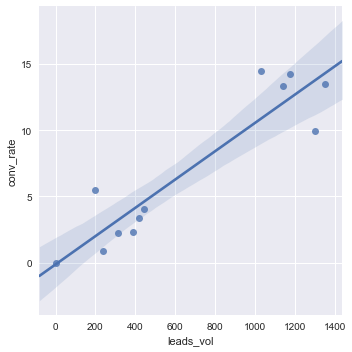

In [177]:
sns.lmplot(x='leads_vol', y='conv_rate', data=leads_convs)

In [178]:
from scipy import stats
#Pearson correlation
stats.pearsonr(leads_convs['leads_vol'], leads_convs['conv_rate'])

(0.9225479152627392, 1.9253648642743192e-05)

Conversions volume and conversion rate appear to be strongly correlated:

 - Pearson: corr coeff 0.92, pvalue 1.9253648642743192e-05

The pvalue is less than 0.05, that suggests that the correlation between the variables is statistically significant.

This does not mean that the volume of leads directly affects the conversion rate. 

The factors that influnce the conversion are the willingness of the lead to become customer and the performance of the SDR/SR. Having a large pool of leads certaninly helps in increasing conversions but the conversion rate is mostly influenced by the performance of the sales team and the quality of the product.

The overall increase of the conversion rate could have been driven by:

- Improved quality of product. As the number of customers increased the company could have collected more feedback and translated it into a better product.
- Increased pool of leads led the sales team to have more insights on leads behaviour, translating them into more effective negotiations.
- Sales team became more structured.

### 6. Conversions Volume Across Channel

In [179]:
conv_vol_channel=pd.crosstab(funnel.origin, funnel.converted).Yes.sort_values(ascending=False)
conv_vol_channel

origin
organic_search       271
paid_search          195
unknown              193
social                75
direct_traffic        56
referral              24
email                 15
display                6
other                  4
other_publicities      3
Name: Yes, dtype: int64

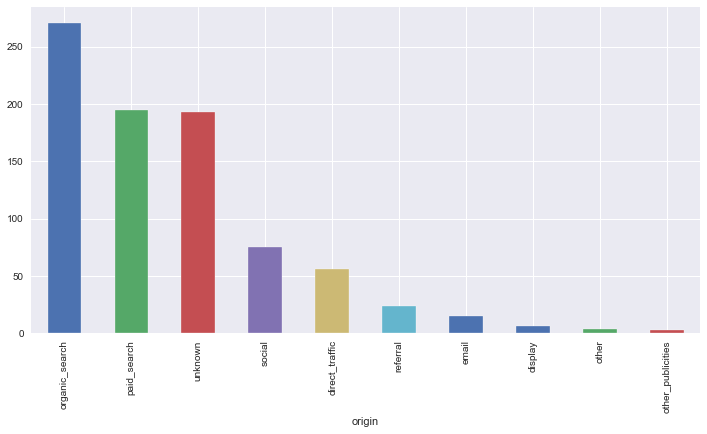

In [180]:
conv_vol_channel.plot(kind='bar', figsize=(12,6))

### 7. Conversion Rate Across Channel

In [181]:
conv_rate_channel=(pd.crosstab(funnel.origin, funnel.converted, normalize='index').Yes.sort_values(ascending=False))*100
conv_rate_channel

origin
unknown              16.652286
paid_search          12.295082
organic_search       11.803136
direct_traffic       11.222445
referral              8.450704
social                5.555556
display               5.084746
other_publicities     4.615385
email                 3.042596
other                 2.666667
Name: Yes, dtype: float64

Text(0, 0.5, 'Conversion Rate')

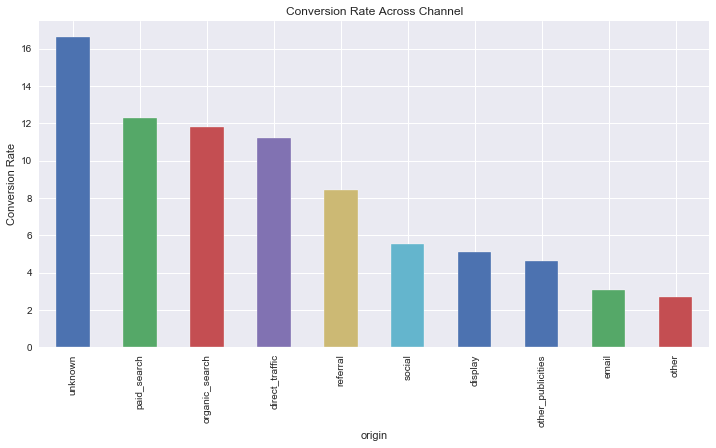

In [182]:
conv_rate_channel.plot(kind='bar', figsize=(12,6), title='Conversion Rate Across Channel').set_ylabel('Conversion Rate')

### 8. Leads Volume Across Channels

In [183]:
leads_vol_channel=funnel['origin'].value_counts().sort_values(ascending=False)
leads_vol_channel

organic_search       2296
paid_search          1586
social               1350
unknown              1159
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

Text(0, 0.5, 'Leads Volume')

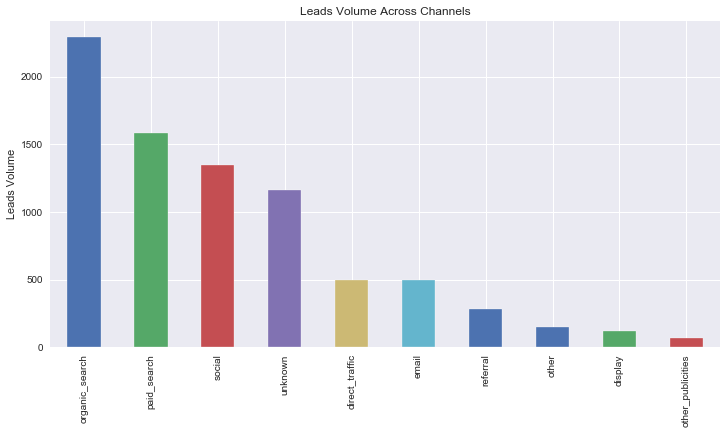

In [184]:
leads_vol_channel.plot(kind='bar', figsize=(12,6), title='Leads Volume Across Channels').set_ylabel('Leads Volume')

### 9.	Which channel is the most effective in generating leads and converting users?

In [185]:
#merge leads volume, conversions volume and coversion rate across channels
channel_df=leads_vol_channel.rename('leads_vol').to_frame().merge(conv_rate_channel.rename('conversion_rate').to_frame(),right_index=True, left_index=True).merge(conv_vol_channel.rename('conv_vol').to_frame(),right_index=True, left_index=True)
channel_df

,leads_vol,conversion_rate,conv_vol
organic_search,2296,11.803136,271
paid_search,1586,12.295082,195
social,1350,5.555556,75
unknown,1159,16.652286,193
direct_traffic,499,11.222445,56
email,493,3.042596,15
referral,284,8.450704,24
other,150,2.666667,4
display,118,5.084746,6
other_publicities,65,4.615385,3


In [186]:
#create col 'channel' for legend
channel_df['channel']=channel_df.index
channel_df.sort_values(by='conv_vol', ascending=False)
channel_df

,leads_vol,conversion_rate,conv_vol,channel
organic_search,2296,11.803136,271,organic_search
paid_search,1586,12.295082,195,paid_search
social,1350,5.555556,75,social
unknown,1159,16.652286,193,unknown
direct_traffic,499,11.222445,56,direct_traffic
email,493,3.042596,15,email
referral,284,8.450704,24,referral
other,150,2.666667,4,other
display,118,5.084746,6,display
other_publicities,65,4.615385,3,other_publicities


In [187]:
#remove unknown
channel_df.drop('unknown', axis=0, inplace=True)
channel_df

,leads_vol,conversion_rate,conv_vol,channel
organic_search,2296,11.803136,271,organic_search
paid_search,1586,12.295082,195,paid_search
social,1350,5.555556,75,social
direct_traffic,499,11.222445,56,direct_traffic
email,493,3.042596,15,email
referral,284,8.450704,24,referral
other,150,2.666667,4,other
display,118,5.084746,6,display
other_publicities,65,4.615385,3,other_publicities


#### Explanatory Plot

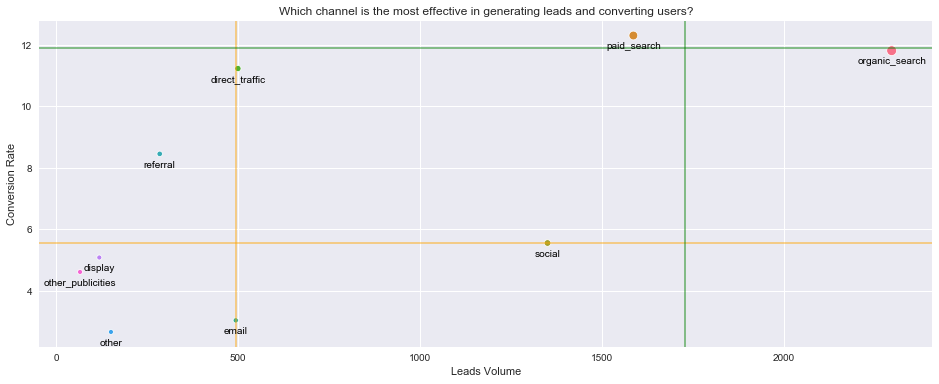

In [188]:
plt.figure(figsize=(16,6))
plot=sns.scatterplot(x=channel_df.leads_vol, y=channel_df.conversion_rate, size=channel_df.conv_vol/channel_df.conv_vol.sum(), hue=channel_df.channel, legend=False)

plt.title('Which channel is the most effective in generating leads and converting users?')
plt.ylabel('Conversion Rate')
plt.xlabel('Leads Volume')

for line in range(0,channel_df.shape[0]):
     plot.text(channel_df.leads_vol[line]+0.2, channel_df.conversion_rate[line]-0.2, 
               channel_df.channel[line], 
               horizontalalignment='center', verticalalignment='top', color='black')
        
plt.axhline(channel_df.conversion_rate.median(), color='orange', alpha=0.5)
plt.axvline(channel_df.leads_vol.median(), color='orange', alpha=0.5)

plt.axhline(channel_df.conversion_rate.quantile(0.9), color='green', alpha=0.5)
plt.axvline(channel_df.leads_vol.quantile(0.9), color='green', alpha=0.5)

### Correlation Analysis

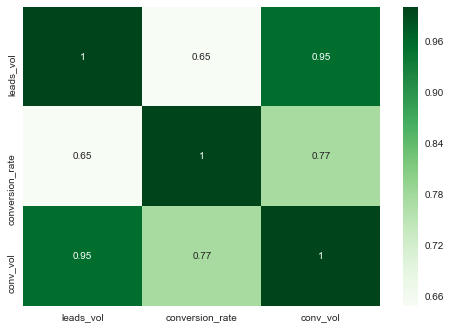

In [189]:
sns.heatmap(channel_df.corr(), cmap='Greens', annot=True)

## Conclusions

- The 10.5% of the users converted over the period under examination. The monthly average conversion rate is 6.98%, the median is 4.77%. The conversion rate consistently grew until February 2018, the overall percent change of the conversion rate is 1092.24% during the period under observation.
- Despite a drop in leads volume and conversions volume happened in December 2017, the conversion rate grew steadily. Although less leads reached out to the company, the company incresed its effevtivness in converting leads.
- The most effective channel in converting users (ignoring unkown) is paid search (12.3% conversion rate), the second one is organic search (11.8%) and the third is direct traffic (11.22%).
- Despite being slightly less effective than paid search, organic search converted more users, 271 versus 195, and attracted more leads, 2296 versus 1586.
- Social positions as third most effective channel to attract leads but presents quite a low conversion rate (5.55%). 
- Direct traffic is quite effective in converting users, but the ability to attract leads and the volume of conversions is not as attractive as paid and organic search.
- The monthly conversion rate is strongly correlated with the monthly leads volume. The correlation between conversion rate and conversions volume weakens if the analysis is performed across channels instead of comparing monthly metrics. In general conversion rate could depend on the volume of leads that reached out to the company, but when the data is grouped by channel, the idiosyncracities of each channel take over influencing the relation between the conversion rate and the leads volume.
- The factors that influnce the conversion are the willingness of the lead to become customer and the performance of the SDR/SR. Having a large pool of leads certaninly helps in increasing conversions but the conversion rate is mostly influenced by the performance of the sales team and the quality of the product. The overall increase of the conversion rate could have been driven by:
     - Improved quality of product. As the number of customers increased the company could have collected more feedback and translated it into a better product.
     - Increased pool of leads led the sales team to have more insights on leads behaviour, translating them into more effective negotiations.
     - Sales team became more structured.






### Limitations

- There is no complete view in the overall marketing funnel, for instance additional data that could have produce a more extensive analyisis would be:
    - Amount of impressions for paid search, social media and ads displayed on websites.
    - Amount of emails sent to potential leads.
- Important economic data are not included such as:
    - Customer acquisition cost across channels.
    - Budget for SEO.